Source https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

# Problem description #
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: <br>
one for h1n1_vaccine and one for seasonal_vaccine.<br>
<br>
Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.<br>
<br>

## Labels ##
For this competition, there are two target variables:<br>
<br>
h1n1_vaccine - Whether respondent received H1N1 flu vaccine.<br>
seasonal_vaccine - Whether respondent received seasonal flu vaccine.<br>
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. <br>
This is formulated as a multilabel (and not multiclass) problem.<br>
<br>

## The features in this dataset ##
<br>
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.<br>
<br>
For all binary variables: 0 = No; 1 = Yes.<br>
<br>
h1n1_concern - Level of concern about the H1N1 flu.<br>
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.<br>
 <br>
h1n1_knowledge - Level of knowledge about H1N1 flu.<br>
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.<br>
 <br>
behavioral_antiviral_meds - Has taken antiviral medications. (binary)<br>
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)<br>
behavioral_face_mask - Has bought a face mask. (binary)<br>
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)<br>
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)<br>
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)<br>
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)<br>
doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)<br>
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)<br>
chronic_med_condition - Has any of the following chronic medical conditions:  <br>
asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary) <br>
child_under_6_months - Has regular close contact with a child under the age of six months. (binary) <br>
health_worker - Is a healthcare worker. (binary) <br>
health_insurance - Has health insurance. (binary) <br>
<br>
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness. <br>
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. <br>
 <br>
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. <br>
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. <br>
 <br>
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine. <br>
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. <br>
 <br>
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness. <br>
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. <br>
 <br>
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine. <br>
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. <br>
 <br>
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine. <br>
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. <br>
 <br>
age_group - Age group of respondent. <br>
education - Self-reported education level. <br>
race - Race of respondent. <br>
sex - Sex of respondent. <br>
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds. <br>
marital_status - Marital status of respondent. <br>
rent_or_own - Housing situation of respondent. <br>
employment_status - Employment status of respondent. <br>
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings. <br>
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census. <br>
household_adults - Number of other adults in household, top-coded to 3. <br>
household_children - Number of children in household, top-coded to 3. <br>
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings. <br>
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings. <br>

## Performance metric ##
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. <br>
The mean of these two scores will be the overall score. A higher value indicates stronger performance. <br>
<br>
In Python, you can calculate this using sklearn.metrics.roc_auc_score for this multilabel setup with the default average="macro" parameter. <br>
<br>

## Imports and Data-Loading ##

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.svm import SVC

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
# read the csv-files and take the respondent_id column as index:

X_train_df = pd.read_csv("training_set_features.csv", index_col="respondent_id")
y_train_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
X_test_df = pd.read_csv("test_set_features.csv", index_col="respondent_id")

#X_train_df.shape
# Output:
# (26707, 36)

#X_test_df.shape
# out:
# (26708, 36)

In [4]:
#check sorting and completeness of respondent_id's in train and test data:
np.testing.assert_array_equal(X_train_df.index.values, y_train_df.index.values)

# out: 
# no output means the arrays are equal, otherwize an error would be risen.

### Usefull Functions ###

In [5]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1], color="grey", linestyle="--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

In [6]:
def plot_roc_h1n1_and_seasonal(y_eval, y_preds):
    fig, ax = plt.subplots(1,2,figsize=(7, 3.5))

    plot_roc(
        y_eval["h1n1_vaccine"],
        y_preds["h1n1_vaccine"],
        "h1n1_vaccine",
        ax=ax[0]
    )

    plot_roc(
        y_eval["seasonal_vaccine"],
        y_preds["seasonal_vaccine"],
        "seasonal_vaccine",
        ax=ax[1]
    )

    fig.tight_layout()

In [7]:
def true_preds(preds):
    result =  pd.DataFrame(
        {
            "h1n1_vaccine": preds[0][:,1],
            "seasonal_vaccine": preds[1][:,1],
        },
        index=y_eval.index
    )
    return result

In [8]:
def train_fullset_and_save(estimator, X_test_df, X_train_df, y_train_df,submission_data_filepath):
    submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")
    np.testing.assert_array_equal(submission_df.index.values, X_test_df.index.values)
    
    estimator.fit(X_train_df, y_train_df)
    test_preds = estimator.predict_proba(X_test_df)

    submission_df["h1n1_vaccine"]=test_preds[0][:,1]
    submission_df["seasonal_vaccine"]=test_preds[1][:,1]
    
    submission_df.to_csv(submission_data_filepath, index=True)

#### Look at the Table ####

In [56]:
X_train_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [57]:
y_train_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


In [58]:
print(X_train_df.shape)
print(y_train_df.shape)
print(X_test_df.shape)
print(X_train_df.dtypes)

(26707, 35)
(26707, 2)
(26708, 35)
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                          

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

## Models to Consider: ##
1. Random Forrest with Scikit <br>
1.1. Random Forrest: only numerical columns <br>
1.2. Random Forrest: all columns <br>
1.3. Random Forrest: parameter optimization with grid-search <br>
2. XGBoost <br>
<br>

### 1.1. Random Forrest - Using Only Numerical Columns ###

In [10]:
num_cols = X_train_df.columns[X_train_df.dtypes != "object"].values
non_numeric_columns = X_train_df.columns[X_train_df.dtypes == "object"].values

In [11]:
# numeric columns:
# numeric columns contain all columns that have a numeric datatype - ignoring the fact, that most of them are not numeric at all 
# but just boolean, modelled as "0" and "1" instead of "true" and "false"
num_cols


array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object)

In [12]:
non_numeric_columns

array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'], dtype=object)

In [13]:
# train test split:
RANDOM_SEED = 42

# output types are numpy.ndarray:
#X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_train_df.iloc[:,1:].to_numpy(), y_train_df.iloc[:,1:].to_numpy(), test_size=0.2, shuffle=True)

# output types are pandas dataframes:
X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size=0.33, shuffle=True, stratify=y_train_df, random_state=RANDOM_SEED)


In [16]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 10
n_estimators = 200

rdfc = RandomForestClassifier(max_depth=max_depth, random_state=0, n_estimators=n_estimators)

# numeric columns for regression:

numeric_preprocessing_pipeline = Pipeline([
    ("simple_imputer", SimpleImputer(strategy="median"))
])


# column transformer with only numerical columns:

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_pipeline, num_cols)
    ],
    remainder="drop"
)

multi_estimator_rdf= MultiOutputClassifier(estimator=rdfc)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("multi_estimator_rdf", multi_estimator_rdf),
])

In [17]:
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)

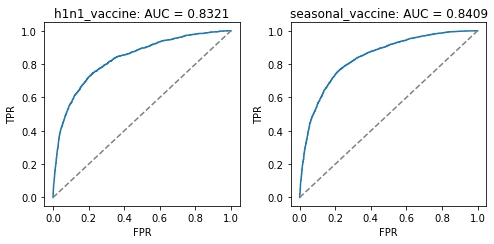

In [18]:
y_preds = true_preds(preds)

plot_roc_h1n1_and_seasonal(y_eval, y_preds)

In [19]:
# COMPETITION METRIC:
roc_auc_score(y_eval, y_preds)

0.8364909226136257

##### Fullset Training and Saving Results #####

In [20]:
train_fullset_and_save(full_pipeline,  X_test_df, X_train_df, y_train_df,"my_submission_rdf_numcols.csv")

### Random Forrest - Using all Columns ###

In [70]:
# impute missing values, scale numeric values, one-hot-encode non-numeric values:

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"].values
non_numeric_columns = X_train_df.columns[X_train_df.dtypes == "object"].values	

max_depth = 10
n_estimators = 400
min_samples_leaf = 10

rdfc = RandomForestClassifier(max_depth=max_depth, random_state=0, n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)

multi_rdfc = MultiOutputClassifier(estimator=rdfc)

numeric_preprocessing_pipeline = Pipeline([
    ("SimpleImputer", SimpleImputer(strategy="median"))
])

full_columnTransformer = ColumnTransformer(
    transformers= [
        ("numeric_preprocessing", numeric_preprocessing_pipeline, numeric_columns),
        ("ohe", OneHotEncoder(), non_numeric_columns)
    ],
    remainder="passthrough"
)

full_pipeline = Pipeline([
    ("ColumnTransformer", full_columnTransformer),
    ("MultiEstimator", multi_rdfc)
])



In [71]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size= 0.3, random_state=42, shuffle=True)

In [72]:
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)

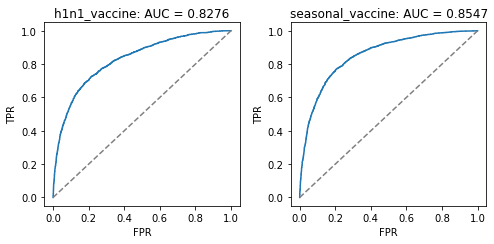

In [73]:
y_preds = true_preds(preds)

plot_roc_h1n1_and_seasonal(y_eval, y_preds)

In [74]:
# competition metric:

roc_auc_score( y_eval, y_preds)

0.8411872181254174

##### Fullset Training and Saving Results #####

In [75]:
# save to "my_submission_file":

my_submission_file = "my_submission_fullfeature.csv"
train_fullset_and_save(full_pipeline, X_test_df, X_train_df, y_train_df, my_submission_file)

### Gridsearch ###
For parameter optimization.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# define prepro pipeline, the estimator and the grid to search over:

# prepro pipeline:
# impute missing values, scale numeric values, one-hot-encode non-numeric values:


numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"].values
non_numeric_columns = X_train_df.columns[X_train_df.dtypes == "object"].values	

numeric_preprocessing_pipeline = Pipeline([
    ("SimpleImputer", SimpleImputer(strategy="median"))
])

full_columnTransformer = ColumnTransformer(
    transformers= [
        ("numeric_preprocessing", numeric_preprocessing_pipeline, numeric_columns),
        ("ohe", OneHotEncoder(), non_numeric_columns)
    ],
    remainder="passthrough"
)


# the estimator:

multi_rdfc = MultiOutputClassifier(estimator=RandomForestClassifier())
multi_pipeline = Pipeline([
    ("ColumnTransformer", full_columnTransformer),
    ("MultiEstimator", multi_rdfc)
])

# the parameter-grid to seearch over (for the specific "MultiEstimator" of the multi_pipeline):

multi_parameters = {
    "MultiEstimator__estimator__max_depth":[15, 20],
    "MultiEstimator__estimator__n_estimators": [100, 300, 500],
    "MultiEstimator__estimator__min_samples_leaf": [5, 50, 100]
    }


# the gridsearch:

multi_gsclf = GridSearchCV(multi_pipeline, multi_parameters, refit=True)

In [29]:
# train-eval splitting:

X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size= 0.3, random_state=42, shuffle=True)

In [30]:
# doing the search: 

multi_gsclf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'be...
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'], dtype=object))])),
                                       ('MultiEstimator',
                                        MultiOutputCla

In [31]:
# predict probabilities with the best estimator found:

y_best_multi = multi_gsclf.predict_proba(X_eval)
y_preds = true_preds(y_best_multi)

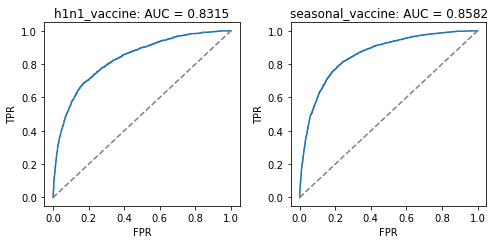

In [32]:
# plot the roc-curves for both predictions:

plot_roc_h1n1_and_seasonal(y_eval, y_preds)

In [33]:
# the competition metric:

roc_auc_score(y_eval, y_preds)

0.8448460004322889

##### Retrain an Estimator with the best Parameters as Check #####

In [48]:
# get the parameters of the best estimator:

n_estimators = multi_gsclf.best_params_['MultiEstimator__estimator__max_depth']
min_samples_leaf = multi_gsclf.best_params_['MultiEstimator__estimator__min_samples_leaf']
max_depth = multi_gsclf.best_params_['MultiEstimator__estimator__n_estimators']

n_estimators, min_samples_leaf, max_depth

(20, 5, 500)

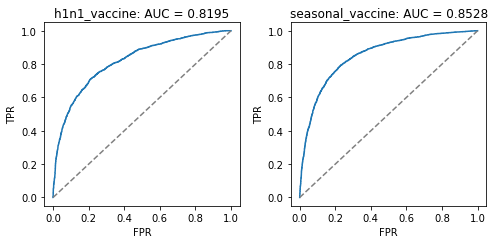

In [45]:
# Take the parameters from the best estimator of the grid search and train another estimator for comparison:

rfc = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
multirfc = MultiOutputClassifier(rfc)
multi_pipe = Pipeline([
    ("ColumnTransformer", full_columnTransformer),
    ("MultiEstimator", multirfc)
])
multi_pipe.fit(X_train, y_train)
y_p = multi_pipe.predict_proba(X_eval)
y_prd = true_preds(y_p)
plot_roc_h1n1_and_seasonal(y_eval, y_prd)

In [46]:
roc_auc_score(y_eval, y_prd)

0.8361215011439262

Summary: the fullpipeline after the gridsearch seems to be the estimator with the best parameters - like one would expect for the "refit=True"
parametrization of the GridSearchCV - (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

##### Fullset Training and Saving Results #####

In [86]:

my_submission_file = "my_submission_gridsearch_fullfeatures.csv"
train_fullset_and_save(full_pipeline, X_test_df, X_train_df, y_train_df, my_submission_file)

## Training Two Separate Classifiers on Gridsearch ##

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size= 0.3, random_state=42, shuffle=True)

In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"].values
non_numeric_columns = X_train_df.columns[X_train_df.dtypes == "object"].values	

# gridsearch training:
h1n1_clf = RandomForestClassifier()
seasonal_clf = RandomForestClassifier()


numeric_preprocessing_pipeline = Pipeline([
    ("SimpleImputer", SimpleImputer(strategy="median"))
])

full_columnTransformer = ColumnTransformer(
    transformers= [
        ("numeric_preprocessing", numeric_preprocessing_pipeline, numeric_columns),
        ("ohe", OneHotEncoder(), non_numeric_columns)
    ],
    remainder="passthrough"
)


h1n1_pipeline = Pipeline([
    ("ColumnTransformer", full_columnTransformer),
    ("h1n1_estimator", h1n1_clf)
])

seasonal_pipeline = Pipeline([
    ("ColumnTransformer", full_columnTransformer),
    ("seasonal_estimator", seasonal_clf)
])

In [115]:
#h1n1_parameters = {"h1n1_estimator__max_depth":[5, 10], "h1n1_estimator__n_estimators": [100, 300, 500], "h1n1_estimator__min_samples_leaf": [5, 50, 100]}

h1n1_parameters = {"h1n1_estimator__max_depth":[5, 10], "h1n1_estimator__n_estimators": [100, 300]}
seasonal_parameters = {"seasonal_estimator__max_depth":[5, 10], "seasonal_estimator__n_estimators": [100, 300]}

h1n1_gsclf = GridSearchCV(h1n1_pipeline, h1n1_parameters, refit=True)
seasonal_gsclf = GridSearchCV(seasonal_pipeline, seasonal_parameters, refit=True)

In [116]:
# fitting both classifiers:

h1n1_gsclf.fit(X_train, y_train["h1n1_vaccine"])
seasonal_gsclf.fit(X_train, y_train["seasonal_vaccine"])

GridSearchCV(estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'be...
                                                                         array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupa

In [117]:
# from 2 separate estimators: 
y_best_h1n1 = h1n1_gsclf.predict_proba(X_eval)
y_best_seasonal = seasonal_gsclf.predict_proba(X_eval)
 
y_preds =  true_preds([y_best_h1n1, y_best_seasonal])

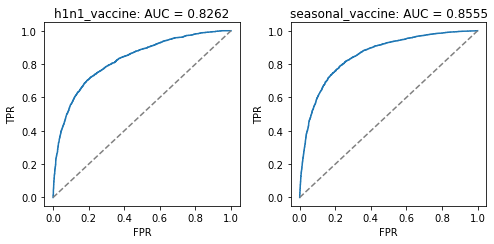

In [118]:
plot_roc_h1n1_and_seasonal(y_eval, y_preds)

In [119]:
roc_auc_score(y_eval, y_preds)

0.8408373604358197

In [120]:
# train with full dataset and prepare to save:


h1n1_gsclf.fit(X_train_df, y_train_df["h1n1_vaccine"])
seasonal_gsclf.fit(X_train_df, y_train_df["seasonal_vaccine"])

test_preds_h1n1 = h1n1_gsclf.predict_proba(X_test_df)
test_preds_seasonal = seasonal_gsclf.predict_proba(X_test_df)



In [124]:
submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")
np.testing.assert_array_equal(submission_df.index.values, X_test_df.index.values)

submission_df["h1n1_vaccine"]=test_preds_h1n1[:,1]
submission_df["seasonal_vaccine"]=test_preds_seasonal[:,1]

submission_df.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.138765,0.349054
26708,0.053248,0.100158
26709,0.393236,0.715167
26710,0.404368,0.776298
26711,0.258029,0.482513


In [125]:
# save to "my_submission" file:

my_submission_file = "my_submission_gridsearch_2separate.csv"
submission_df.to_csv(my_submission_file, index=True)